###  다중선형회귀(Multivariable Liner Regression)
---
- 다수의 $x$로부터 $y$ 예측
- 독립 변수 $x$의 개수가 3개므로 수식으로 표현
- $H(x) = w1x1 + w2x2 + w3x3 + b $
    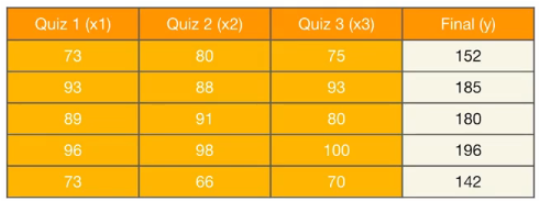

In [1]:
# 모듈 로딩 ----------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# 랜덤 시드 설정 ------------------------------
torch.manual_seed(1)

In [3]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [9]:
print(f'x1_train :  {x1_train.shape}, {x1_train.ndim}차원')
print(f'x2_train :  {x2_train.shape}, {x2_train.ndim}차원')
print(f'x3_train :  {x3_train.shape}, {x3_train.ndim}차원')
print(f'y_train  :  {y_train.shape}, {y_train.ndim}차원')

x1_train :  torch.Size([5, 1]), 2차원
x2_train :  torch.Size([5, 1]), 2차원
x3_train :  torch.Size([5, 1]), 2차원
y_train  :  torch.Size([5, 1]), 2차원


In [8]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b  = torch.zeros(1, requires_grad=True)

In [10]:
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

In [11]:
##  학습 진행
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079378


In [19]:
# 예측
pre_y=w1*73+w2*80+w3*75+b
print(f'pre_y : {pre_y}, {pre_y.ndim}, {pre_y.shape} {pre_y.size}', sep='\n')

pre_y : tensor([152.4309], grad_fn=<AddBackward0>), <built-in method dim of Tensor object at 0x000002570D994E50>, torch.Size([1]) <built-in method size of Tensor object at 0x000002570D994E50>


In [22]:
print(pre_y.ndim, pre_y.shape, pre_y.size())

1 torch.Size([1]) torch.Size([1])
